Running Stationary experiments...
Running Non-Stationary experiments...


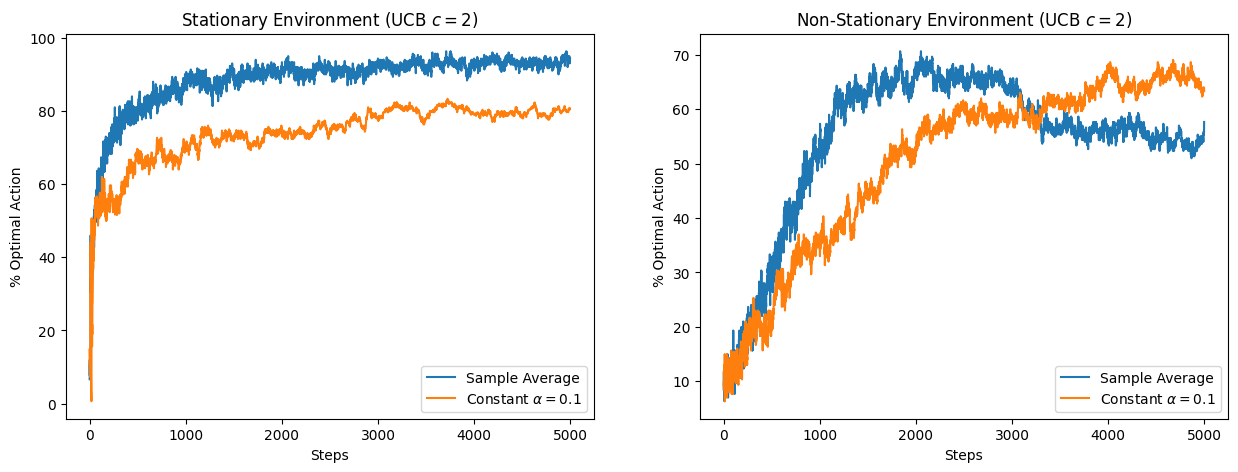

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, k=10, is_non_stationary=False):
        self.k = k
        self.is_non_stationary = is_non_stationary
        
        self.q_true = np.zeros(k) if is_non_stationary else np.random.normal(0, 1, k)
        self.optimal = np.argmax(self.q_true)
        
    def step(self, action):
        reward = np.random.normal(self.q_true[action], 1)
        if self.is_non_stationary:
         
            self.q_true += np.random.normal(0, 0.01, self.k)
            self.optimal = np.argmax(self.q_true)
        return reward

def run_ucb_bandit(k=10, steps=10000, runs=300, is_non_stationary=False, c=2, alpha=None):
    optimal_action_pct = np.zeros(steps)
    
    for _ in range(runs):
        env = Bandit(k, is_non_stationary)
        q_est = np.zeros(k)
        action_counts = np.zeros(k)
        
        for t in range(1, steps + 1):
            
            if 0 in action_counts:
                action = np.argmin(action_counts) 
            else:
                ucb_values = q_est + c * np.sqrt(np.log(t) / action_counts)
                action = np.argmax(ucb_values)
                
            reward = env.step(action)
            action_counts[action] += 1
            
          
            if alpha is None:
                q_est[action] += (reward - q_est[action]) / action_counts[action]
            else:
                q_est[action] += alpha * (reward - q_est[action])
                
            if action == env.optimal:
                optimal_action_pct[t-1] += 1
                
    return (optimal_action_pct / runs) * 100


steps = 5000 
print("Running Stationary experiments...")
stat_sa = run_ucb_bandit(steps=steps, is_non_stationary=False, alpha=None)
stat_ca = run_ucb_bandit(steps=steps, is_non_stationary=False, alpha=0.1)

print("Running Non-Stationary experiments...")
nonstat_sa = run_ucb_bandit(steps=steps, is_non_stationary=True, alpha=None)
nonstat_ca = run_ucb_bandit(steps=steps, is_non_stationary=True, alpha=0.1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(stat_sa, label='Sample Average')
ax1.plot(stat_ca, label='Constant $\\alpha=0.1$')
ax1.set_title('Stationary Environment (UCB $c=2$)')
ax1.set_xlabel('Steps')
ax1.set_ylabel('% Optimal Action')
ax1.legend()

ax2.plot(nonstat_sa, label='Sample Average')
ax2.plot(nonstat_ca, label='Constant $\\alpha=0.1$')
ax2.set_title('Non-Stationary Environment (UCB $c=2$)')
ax2.set_xlabel('Steps')
ax2.set_ylabel('% Optimal Action')
ax2.legend()

plt.show()

In [ ]:

import math
import numpy as np

def naive_pac(env, epsilon, delta):
    k = env.k
   
    l = math.ceil((2 / (epsilon**2)) * math.log(2 * k / delta))
    
    q_estimates = np.zeros(k)
    
    print(f"Algorithm parameters: $\\epsilon$={epsilon}, $\\delta$={delta}")
    print(f"Pulls required per arm (l): {l}")
    print(f"Total pulls required: {l * k}")
    print("-" * 30)
    

    for arm in range(k):
        total_reward = sum(env.step(arm) for _ in range(l))
        q_estimates[arm] = total_reward / l
        
    best_arm_estimate = np.argmax(q_estimates)
    return best_arm_estimate, q_estimates


np.random.seed(42) 
env_pac = Bandit(k=10, is_non_stationary=False)

epsilon_val = 0.1
delta_val = 0.05
chosen_arm, estimates = naive_pac(env_pac, epsilon_val, delta_val)

print(f"True optimal arm: {env_pac.optimal}")
print(f"Algorithm chose arm: {chosen_arm}")
print(f"Is chosen arm within $\\epsilon$ of optimal? {env_pac.q_true[env_pac.optimal] - env_pac.q_true[chosen_arm] <= epsilon_val}")

Algorithm parameters: $\epsilon$=0.1, $\delta$=0.05
Pulls required per arm (l): 1199
Total pulls required: 11990
------------------------------
True optimal arm: 6
Algorithm chose arm: 6
Is chosen arm within $\epsilon$ of optimal? True


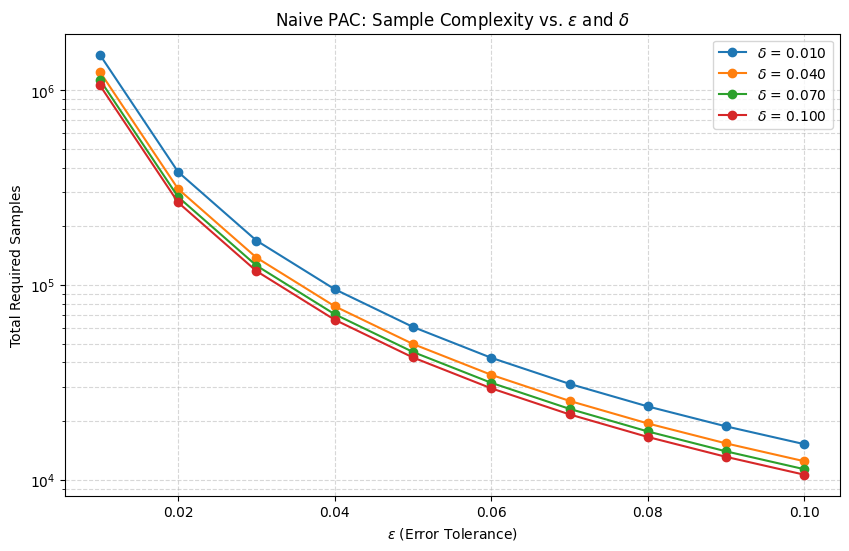

In [ ]:

import numpy as np
import math
import matplotlib.pyplot as plt


epsilons = np.linspace(0.01, 0.1, 10) 
deltas = np.linspace(0.01, 0.1, 4)   

k = 10

plt.figure(figsize=(10, 6))

for d in deltas:
    total_samples = []
    for e in epsilons:
     
        l = math.ceil((2 / (e**2)) * math.log(2 * k / d))
        total_samples.append(l * k)
        
    plt.plot(epsilons, total_samples, marker='o', label=f'$\\delta$ = {d:.3f}')

plt.title('Naive PAC: Sample Complexity vs. $\\epsilon$ and $\\delta$')
plt.xlabel('$\\epsilon$ (Error Tolerance)')
plt.ylabel('Total Required Samples')
plt.yscale('log') 
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.legend()
plt.show()